# Project 1: House Price Prediction
The goal for this project is to build a solution that is capable of predicting the house prices better than individuals.

The following properties can be considered helpful for predicting price of house:
1. Total square feet area
2. Number of bedrooms, bathrooms stories, etc
3. Furnishing status
4. Basic amenities like:
   - Air conditioning
   - Hot water heating
   - Parking
   - Basement

### Import Libraries

In [1]:
#Housing.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
print('Libraries Imported...')

Libraries Imported...


### Import & Read the CSV dataset

In [2]:
df=pd.read_csv('Housing.csv')

### Data Preprocessing
#### Checking the top 5 rows

In [3]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Checking for null values

In [4]:
df.isna().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

#### Double checking null values and datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


`Yes, The dataset contains objects to be converted to int64 type which shall be done via encoding.`
#### Encode Objects to Int
##### - Make A Label Encoding Function to Simplify the Task

In [6]:
def label_encode(df, colName):
    if (type(colName) == str):
        # converting type of columns to 'category'
        df[colName] = df[colName].astype('category')
        # Assigning numerical values and storing in another column
        df[colName] = df[colName].cat.codes
    elif (type(colName) == list):
        for col in colName:
            # converting type of columns to 'category'
            df[col] = df[col].astype('category')
            # Assigning numerical values and storing in another column
            df[col] = df[col].cat.codes

##### - Objects to Encode
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea
- furnishingstatus

In [7]:
objList = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
label_encode(df, objList)
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


`Now that Label Encoding has been done, Let's start making Test-Train Split of the Dataset.`

---
### Train Test Split
#### Removing nan and infinite values

In [8]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

#### Creating train test split

In [9]:
X = df.drop(columns=['price'])
y = df.price

X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.18, random_state=42)



print("X [Train" + str(X_train.shape) + " + Test" + str(X_test.shape) + " = Total" + str(X.shape) + "]")
print("Y [Train" + str(Y_train.shape) + " + Test" + str(Y_test.shape) + " = Total" + str(y.shape) + "]")

<IPython.core.display.Javascript object>

X [Train(446, 12) + Test(99, 12) = Total(545, 12)]
Y [Train(446,) + Test(99,) = Total(545,)]


### Linear Regression Model
#### Initiate Linear Regression Model & Fit x, y

In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression()

#### Get results for Linear Regression Model

In [11]:
print("Cofficient of Determation:", lr_model.score(X_train,Y_train))
print("Intercet:", lr_model.intercept_)
print("Slope:", lr_model.coef_)

Cofficient of Determation: 0.6788631228214417
Intercet: 244265.02430868987
Slope: [ 2.32452758e+02  9.38417670e+04  1.07778355e+06  4.17285774e+05
  3.97331741e+05  2.72862489e+05  3.93279631e+05  6.67223447e+05
  7.92585080e+05  2.47322510e+05  5.81098960e+05 -2.07885624e+05]


#### Predict using Linear Regression Model

In [12]:
lr_Y_pred = lr_model.predict(X_test)
for i in range(len(Y_test)):
    print(lr_Y_pred[i], Y_test.to_numpy()[i])

5206072.907542578 4060000
7215173.4574504765 6650000
3055573.142575878 3710000
4582440.41096755 6440000
3338704.3130241893 2800000
3564502.6762551526 4900000
5685918.986984403 5250000
6414282.826313051 4543000
2784578.569353882 2450000
2648482.0970924445 3353000
9574345.681570299 10150000
2823047.526239026 2660000
3168555.974461651 3360000
3344142.981841047 3360000
3735822.9982472025 2275000
5294607.279618387 2660000
2998655.2912091278 2660000
4854330.054266481 7350000
4420156.692348064 2940000
3511180.547681244 2870000
5794874.350874289 6720000
5836621.9993926855 5425000
2756798.490292582 1890000
4797589.987683792 5250000
5263288.179733279 4193000
7489628.171702668 12250000
3292999.518637613 3080000
5276761.111369344 5110000
8165462.258800331 9800000
3438993.672935876 2520000
6402149.796138979 6790000
3392281.0324778035 3500000
6790710.607107359 6650000
4165266.5350710275 2940000
3623509.603915477 3325000
5814565.368982261 4200000
4868354.194273523 4900000
4438612.166296779 3290000
32

In [13]:
lr_Y_pred_int = [int(lr_Y_pred) for lr_Y_pred in lr_Y_pred]
lr_Y_pred_accuracy = []
for i in range(len(lr_Y_pred)):
    acc =  (lr_Y_pred_int[i] / Y_test.tolist()[i])
    lr_Y_pred_accuracy.append(acc)
lr_Y_pred_accuracy = [((round(num, 2)-1)*(-1)) for num in lr_Y_pred_accuracy]
d = {'Y_test': Y_test, 'lr_Y_pred': lr_Y_pred_int, 'Accuracy':lr_Y_pred_accuracy}

comp = pd.DataFrame(data=d)
comp

,Y_test,lr_Y_pred,Accuracy
316,4060000,5206072,-0.28
77,6650000,7215173,-0.08
360,3710000,3055573,0.18
90,6440000,4582440,0.29
493,2800000,3338704,-0.19
...,...,...,...
89,6440000,7667817,-0.19
117,5950000,4854841,0.18
131,5810000,5183602,0.11
140,5740000,6472872,-0.13


### Checking Score
#### Few Helpful Functions

In [14]:
# Evaluation Function
def rmse(model, y_test, y_pred, X_train, y_train):
    r_squared = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))
    
# Create model line scatter plot
def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4', line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Price vs Residuals for \n' + model_name), fontsize=16)
    plt.xlabel('Price',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

#### Importing Experimental Libraries

In [15]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

#### Histogram-based Gradient Boosting Regression Tree

R-squared: 0.6367817645922444
Mean Squared Error: 1283402.7715148986


<IPython.core.display.Javascript object>

/usr/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


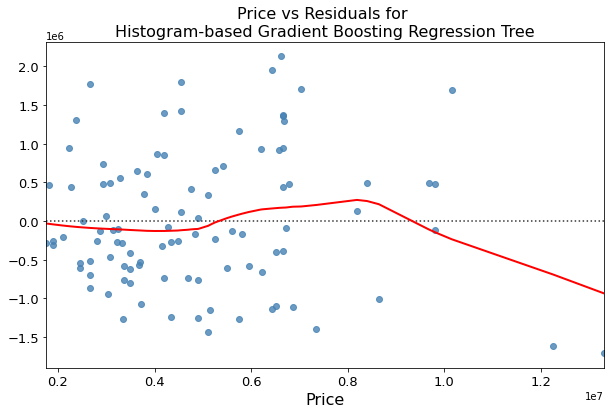

In [16]:
hist = HistGradientBoostingRegressor()
hist.fit(X_train, Y_train)
y_pred = hist.predict(X_test)


rmse(hist, Y_test, lr_Y_pred, X_train, Y_train)

scatter_plot(Y_test, lr_Y_pred, 'Histogram-based Gradient Boosting Regression Tree')

### Conclusion
The results are not very good, so either more data is required or the data is to be optimized in a much better way (data formatting and such) or a different approach/model/technique is to be used or all of the above to improve the predective ability of our model.

---
# <center>Q.E.D.</center>